In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

Loading data

In [3]:
data = pd.read_csv(r"C:\Users\Avnish Roy\OneDrive\Desktop\start-up profit prediction\50_Startups (1).csv")

Exploratory data analysis

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
data.shape

(50, 4)

In [6]:
data.duplicated().sum() # finding duplicate values

0

In [7]:
data.isna().sum() # finding null values

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [9]:
round(data.describe(),4) # finding central tendencies and variability

,R&D Spend,Administration,Marketing Spend,Profit
count,50.0000,50.0000,50.0000,50.0000
mean,73721.6156,121344.6396,211025.0978,112012.6392
std,45902.2565,28017.8028,122290.3107,40306.1803
min,0.0000,51283.1400,0.0000,14681.4000
25%,39936.3700,103730.8750,129300.1325,90138.9025
50%,73051.0800,122699.7950,212716.2400,107978.1900
75%,101602.8000,144842.1800,299469.0850,139765.9775
max,165349.2000,182645.5600,471784.1000,192261.8300


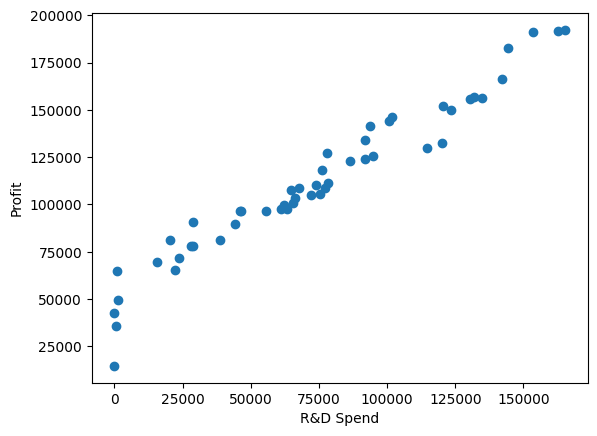

In [10]:
# plotting scatter plots
plt.scatter(data['R&D Spend'], data['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

fitting linear model with R&D spend using sklearn: $\texttt{Profit} = a + b\texttt{R\&D Spend} + \epsilon$

In [11]:
x = data[['R&D Spend']]
y = data[['Profit']]

In [12]:
lr = LinearRegression()

In [13]:
 fit_lm = lr.fit(x,y)

In [14]:
a = fit_lm.intercept_
b = fit_lm.coef_
print(a, b)

[49032.89914125] [[0.85429137]]


In [15]:
y_hat1 = a + np.dot(x, b)
y_hat1

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032],
       [161694.19683741],
       [164033.72501421],
       [160345.46724972],
       [152011.33380847],
       [154396.82286103],
       [136096.36397105],
       [135036.08586475],
       [129219.89081021],
       [127621.20411029],
       [151499.37407569],
       [146869.43093301],
       [115678.82583435],
       [129897.69412683],
       [127413.41482014],
       [122860.50313037],
       [114175.91374003],
       [116000.34693472],
       [112245.81324567],
       [106725.35677792],
       [114850.93206678],
       [104275.40289851],
       [113385.70276482],
       [110633.79960036],
       [105460.14271464],
       [105079.09459155],
       [101994.24845109],
       [101261.18102569],
       [103202.54108032],
       [ 96440.90176556],
       [ 88694.29012885],
       [ 88342.27936946],
       [ 73520.10196791],
       [ 86681.47714396],
       [ 663

In [16]:
def abline(intercept, slope):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope*x_vals
    plt.plot(x_vals, y_vals , '--')

In [17]:
[fit_lm.intercept_, fit_lm.coef_]

[array([49032.89914125]), array([[0.85429137]])]

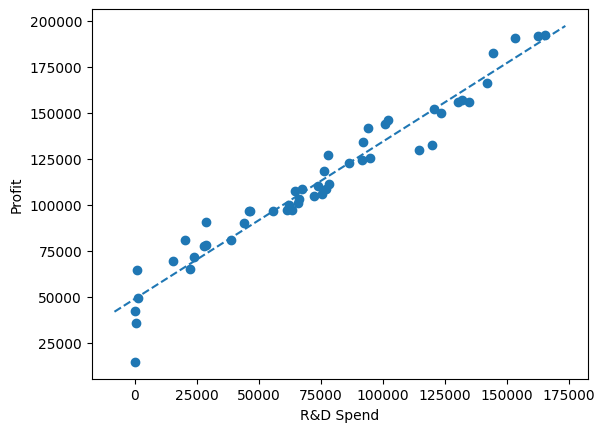

In [18]:
plt.scatter(data['R&D Spend'], data['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
abline(intercept = 49032.89914125, slope = 0.85429137)
plt.show()

In [19]:
R2score = r2_score(y, y_hat1)
print(R2score)

0.9465353160804393


In [20]:
mse = mean_squared_error(y, y_hat1)
print(mse)

85120931.32706906


In [21]:
rmse = np.sqrt(mse)
print(rmse)

9226.100548285232


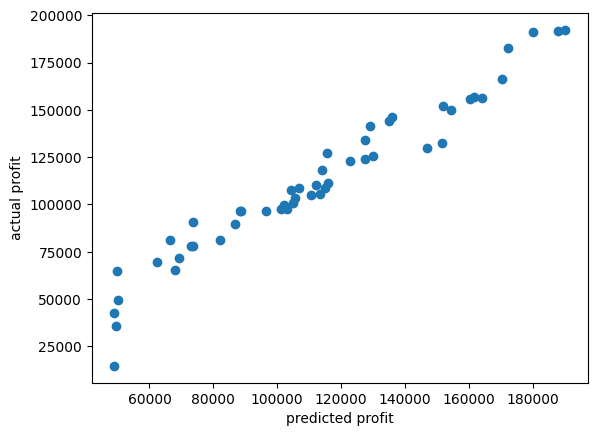

In [22]:
plt.scatter(y_hat1, y)
plt.xlabel('predicted profit')
plt.ylabel('actual profit')
plt.show()

## fitting linear model with R&D spend, Administraition using sklearn: $\texttt{Profit} = a + b\texttt{R\&D Spend} +c\texttt{Administration} + \epsilon$

In [23]:
x = data[['R&D Spend', 'Administration']]
y = data[['Profit']]

In [24]:
lr2 = LinearRegression()
lm2 = lr2.fit(x,y)

In [25]:
a = lm2.intercept_
coef = lm2.coef_
print(a,coef)

[54886.62062756] [[ 0.86211798 -0.05299543]]


In [26]:
 rd_cost = data[['R&D Spend']]
 admi_cost = data[['Administration']]

In [27]:
y_hat2 = a + np.dot(rd_cost,0.86211798 ) + np.dot(admi_cost, -0.05299543) 

In [28]:
y_hat2

array([[190182.18114912],
       [187042.7008298 ],
       [181811.05336208],
       [173063.60538485],
       [172556.56738193],
       [163290.34378745],
       [163140.16166837],
       [159506.55315331],
       [150927.06976967],
       [155456.33889051],
       [136886.73687782],
       [136813.24457849],
       [129060.84888692],
       [127014.29457221],
       [149995.54657273],
       [147121.35178203],
       [115699.01098508],
       [128803.81146384],
       [127934.42602682],
       [121255.05155325],
       [114591.99785153],
       [114318.30311181],
       [112171.73659292],
       [107503.30766766],
       [116046.18959559],
       [103239.55006799],
       [112190.44562907],
       [110275.6422732 ],
       [102151.4436361 ],
       [103336.28469861],
       [102204.71713696],
       [ 99500.88914545],
       [102704.49012848],
       [ 97267.37670651],
       [ 86554.31321652],
       [ 90049.00894844],
       [ 72864.76501485],
       [ 90162.34484421],
       [ 688

In [29]:
mse = mean_squared_error(y, y_hat2)
rmse = np.sqrt(mse)
print(mse , rmse)

83086833.2581635 9115.19792753638


In [30]:
r2score = r2_score(y, y_hat2)
print(r2score)

0.9478129385009172


In [31]:
x = data[['R&D Spend', 'Administration']]
y = data[['Profit']]

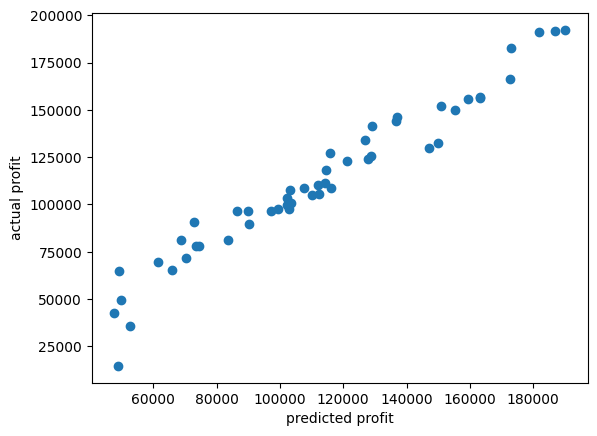

In [32]:
plt.scatter(y_hat2, y)
plt.xlabel('predicted profit')
plt.ylabel('actual profit')
plt.show()

## fitting linear model with R&D spend, Administraition, Marketing Spend  using sklearn: $\texttt{Profit} = a + b\texttt{R\&D Spend} +c\texttt{Administration} + d\texttt{Marketing Spend} +\epsilon$

In [33]:
x = data.drop('Profit', axis = 1)

In [34]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [35]:
y = data['Profit']

In [36]:
lm2 = LinearRegression()

In [37]:
fit_lm = lm2.fit(x,y)

In [38]:
intercept = fit_lm.intercept_
print(intercept)
coeff = fit_lm.coef_
print(coeff)

50122.19298986524
[ 0.80571505 -0.02681597  0.02722806]


In [39]:
 rd_cost = data[['R&D Spend']]
 admi_cost = data[['Administration']]
 Mar_cost = data[['Marketing Spend']]

In [40]:
y_hat3 = intercept + np.dot(rd_cost, 0.80571505) + np.dot(admi_cost, -0.02681597) + np.dot(Mar_cost, 0.02722806) 

In [41]:
y_hat3

array([[192521.25041931],
       [189156.76587189],
       [182147.27698835],
       [173696.69800753],
       [172139.51229063],
       [163580.77868005],
       [158114.09583055],
       [160021.3612703 ],
       [151741.69797408],
       [154884.68248172],
       [135509.01509804],
       [135573.71162289],
       [129138.05278652],
       [127487.99024   ],
       [149548.64486187],
       [146235.15854127],
       [116915.40394374],
       [130192.44562631],
       [129014.22521449],
       [115635.21612801],
       [116639.66762071],
       [117319.44996107],
       [114706.98006991],
       [109996.61359406],
       [113362.96528538],
       [102237.7241839 ],
       [110600.57448172],
       [114408.06956209],
       [101660.02515014],
       [101794.98269728],
       [ 99452.37231814],
       [ 97687.85561226],
       [ 99001.32856215],
       [ 97915.00661347],
       [ 89039.27247994],
       [ 90511.59844823],
       [ 75286.17341835],
       [ 89619.53668339],
       [ 696

In [42]:
r2score = r2_score(y, y_hat3)
print(r2score)

0.9507459940683235


In [43]:
mse = mean_squared_error(y, y_hat3)
rmse = np.sqrt(mse)
print(mse, rmse)

78417126.01913261 8855.344489015242


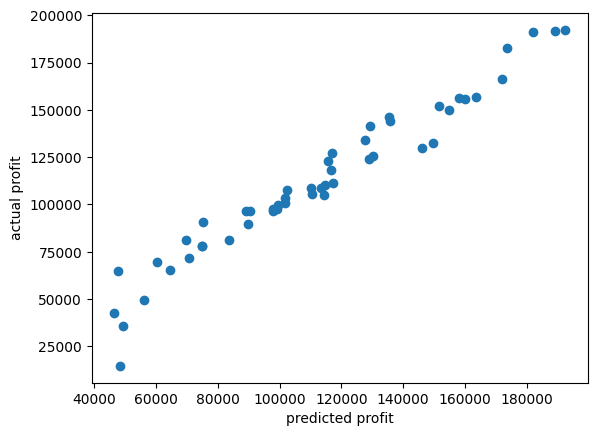

In [44]:
plt.scatter(y_hat3, y)
plt.xlabel('predicted profit')
plt.ylabel('actual profit')
plt.show()

## fitting linear model with R&D spend, Administraition, Marketing Spend  using sklearn: $\texttt{Profit} = a + b\texttt{Administration} +\epsilon$

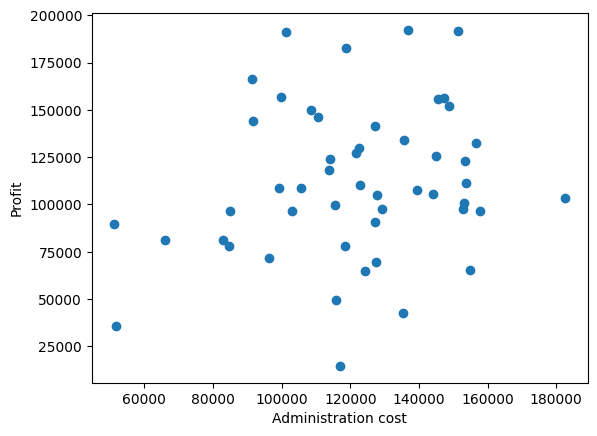

In [45]:
plt.scatter(data['Administration'], data['Profit'])
plt.xlabel('Administration cost')
plt.ylabel('Profit')
plt.show()

In [46]:
x = data[['Administration']]
y = data[['Profit']]

In [47]:
lr4 = LinearRegression()
fit_lm = lr4.fit(x,y)

In [48]:
intercept = fit_lm.intercept_
coeff = fit_lm.coef_
print(f'{intercept},{coeff}')

[76974.47130542],[[0.2887492]]


In [49]:
y_hat4 = intercept + np.dot(x, coeff)
y_hat4

array([[116503.6018596 ],
       [120684.62967237],
       [106180.1681897 ],
       [111240.87333494],
       [103363.77199475],
       [105795.88920124],
       [119478.02760551],
       [118996.16004913],
       [119916.94949302],
       [108355.49495555],
       [108908.4323531 ],
       [103478.93672662],
       [113738.12947398],
       [116098.56469098],
       [122177.41396119],
       [112379.98605074],
       [112085.66687627],
       [118865.50681004],
       [109942.6395962 ],
       [121301.54811819],
       [109853.56335476],
       [121376.42656134],
       [112427.8924309 ],
       [107509.99686616],
       [105641.87903918],
       [117270.33494157],
       [118593.62056111],
       [113895.25812743],
       [129713.23106914],
       [121162.35656519],
       [110365.79866475],
       [121067.02890353],
       [114286.53062157],
       [106732.23933965],
       [122508.46492169],
       [101531.85176777],
       [113661.8505972 ],
       [ 91782.43707469],
       [ 960

In [50]:
def abline(intercept, slope):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope*x_vals
    plt.plot(x_vals, y_vals , '--')

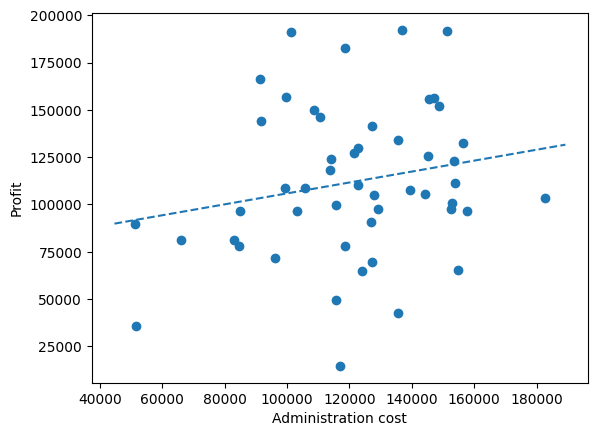

In [51]:
plt.scatter(data['Administration'], data['Profit'])
plt.xlabel('Administration cost')
plt.ylabel('Profit')
abline(intercept =76974.47130542, slope = 0.2887492)  

In [52]:
r2score = r2_score(y, y_hat4)
r2score

0.04028714077757223

In [53]:
mse = mean_squared_error(y, y_hat4)
rmse = np.sqrt(mse)
print(mse, rmse)

1527955397.744143 39089.07005473708


Text(0, 0.5, 'actual profit')

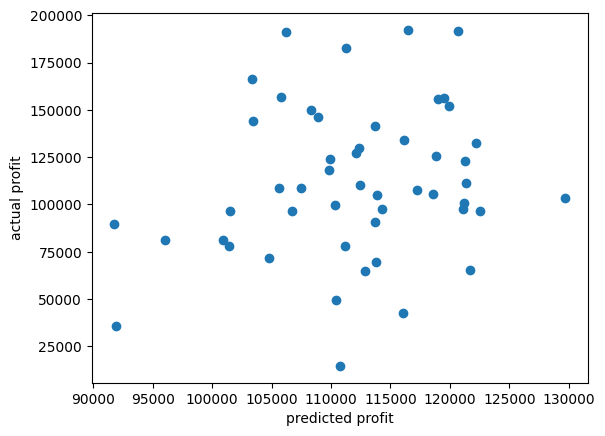

In [54]:
plt.scatter(y_hat4, y)
plt.xlabel('predicted profit')
plt.ylabel('actual profit')

## fitting linear model with R&D spend, Administraition, Marketing Spend  using sklearn: $\texttt{Profit} = a + b\texttt{Administration}+ c\texttt{R\&D Spend} +\epsilon$

In [55]:
x = data[['R&D Spend', 'Administration']]
y = data['Profit']

In [56]:
lm5 = LinearRegression()
fit_lm = lm5.fit(x,y)

In [57]:
a = fit_lm.intercept_
coeff = fit_lm.coef_
print(a, coeff)

54886.62062756297 [ 0.86211798 -0.05299543]


In [58]:
admin_cost = data[['Administration']]
rnd_cost = data[['R&D Spend']]

In [59]:
y_hat5 = a + np.dot(admin_cost, 0.86211798) + np.dot(rnd_cost, -0.05299543)
y_hat5

array([[164145.92347585],
       [176775.02770712],
       [133954.31907725],
       [149544.67828434],
       [126146.06917913],
       [133949.80376448],
       [174655.4089029 ],
       [173445.4965565 ],
       [176711.6987086 ],
       [142044.70213644],
       [144830.86384344],
       [128685.80209459],
       [159677.45965333],
       [166824.18041114],
       [183492.52255278],
       [154527.57508524],
       [155583.71649642],
       [174944.21394367],
       [148457.33588093],
       [182654.04588029],
       [149012.56119176],
       [183303.17580671],
       [156818.46351155],
       [142477.56952774],
       [136395.86848118],
       [171770.9749171 ],
       [175156.75469342],
       [161299.5749189 ],
       [208848.21316618],
       [183341.52044705],
       [151297.62322055],
       [183293.74269334],
       [162928.78997564],
       [140793.40998758],
       [188377.01485338],
       [125769.01502861],
       [162905.0154526 ],
       [ 96763.23174209],
       [1106

In [60]:
r2score = r2_score( y, y_hat5)
r2score

-1.4150691465967529

In [61]:
mse = mean_squared_error(y, y_hat5)
rmse = np.sqrt(mse)
print(mse, rmse)

3845022918.060755 62008.24879046944


Text(0, 0.5, 'Actual value')

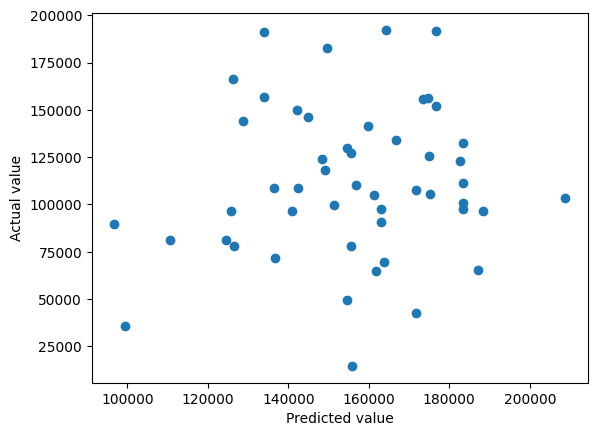

In [62]:
plt.scatter(y_hat5, y)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

## fitting linear model with R&D spend, Administraition, Marketing Spend  using sklearn: $\texttt{Profit} = a +b\texttt{R\&D Spend}+c\texttt{Marketing Spend} +\epsilon$

In [63]:
x = data[['R&D Spend', 'Marketing Spend']]
y = data[['Profit']]

In [64]:
lm6 = LinearRegression()
fit_lm = lm6.fit(x,y)

In [65]:
intercept = fit_lm.intercept_
coeff = fit_lm.coef_
print(intercept, coeff)

[46975.86422072] [[0.79658404 0.02990788]]


In [66]:
rnd_cost = data[['R&D Spend']]
mar_cost = data[['Marketing Spend']]

In [67]:
y_hat6 = intercept + np.dot(rnd_cost, 0.79658404) + np.dot(mar_cost, 0.02990788)
y_hat6

array([[192800.4602162 ],
       [189774.66094884],
       [181405.3794304 ],
       [173441.31009406],
       [171127.62439672],
       [162879.31201691],
       [158028.13052052],
       [160455.7399008 ],
       [152317.80467783],
       [154343.8148972 ],
       [135011.91540925],
       [134638.87086429],
       [129218.39739606],
       [127812.20630282],
       [150192.49254042],
       [146032.7162236 ],
       [117025.89279844],
       [130829.44570301],
       [128882.19986934],
       [115816.41798231],
       [116650.89321414],
       [118384.17182762],
       [114990.38579331],
       [109886.18640413],
       [112552.18751282],
       [102612.90964139],
       [110990.79322151],
       [114978.60655085],
       [103125.01305828],
       [102440.42433769],
       [ 99085.21974699],
       [ 98314.54902875],
       [ 98864.66221808],
       [ 97600.73124858],
       [ 90262.64204128],
       [ 89776.49508396],
       [ 75824.23476045],
       [ 87974.01528415],
       [ 686

In [68]:
r2score = r2_score(y, y_hat6)
r2score

0.9504503015559758

In [69]:
mse = mean_squared_error(y, y_hat6)
rmse = np.sqrt(mse)
print(mse, rmse)

78887897.00648834 8881.885892449212


Text(0, 0.5, 'actual profit')

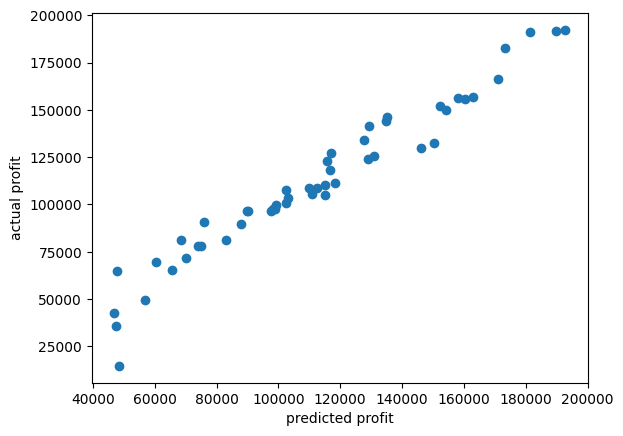

In [70]:
plt.scatter(y_hat6, y)
plt.xlabel('predicted profit')
plt.ylabel('actual profit')

In [71]:
 model_scores = np.array(([1,0.9465353160804393,9226.100548285232], [2,0.9478129385009172,9115.19792753638], [3, 0.9507459940683235,8855.344489015242],[4, 0.04028714077757223,39089.07005473708],[5,-1.4150691465967529, 62008.24879046944],[6,0.9504503015559758,8881.885892449212]))

In [72]:
model_scores

array([[ 1.00000000e+00,  9.46535316e-01,  9.22610055e+03],
       [ 2.00000000e+00,  9.47812939e-01,  9.11519793e+03],
       [ 3.00000000e+00,  9.50745994e-01,  8.85534449e+03],
       [ 4.00000000e+00,  4.02871408e-02,  3.90890701e+04],
       [ 5.00000000e+00, -1.41506915e+00,  6.20082488e+04],
       [ 6.00000000e+00,  9.50450302e-01,  8.88188589e+03]])

In [73]:
model_evaluation_score = pd.DataFrame(model_scores, columns = [['Model no','R2_score', 'RMSE score']])

In [74]:
model_evaluation_score

,Model no,R2_score,RMSE score
0,1.0,0.946535,9226.100548
1,2.0,0.947813,9115.197928
2,3.0,0.950746,8855.344489
3,4.0,0.040287,39089.070055
4,5.0,-1.415069,62008.248790
5,6.0,0.950450,8881.885892


## best model 

In [75]:
model_evaluation_score.loc[model_evaluation_score['R2_score'].idxmax()]

,Model no,R2_score,RMSE score
2,3.0,0.950746,8855.344489


Exploratory Data Analysis

In [76]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [77]:
data.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [78]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [79]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [81]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [82]:
corr=data.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

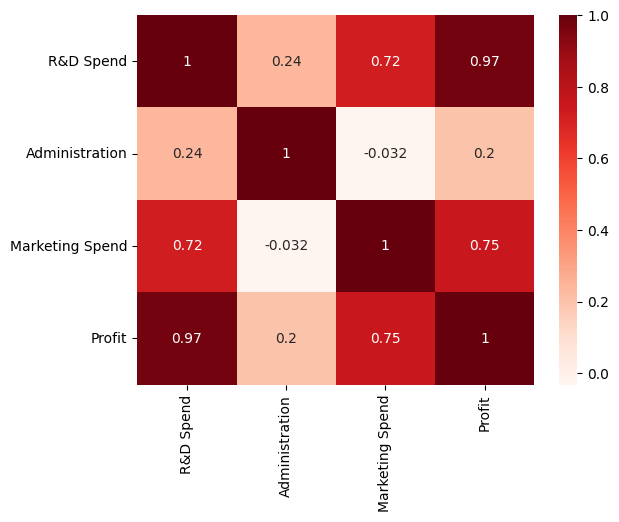

In [83]:
sns.heatmap(corr,annot=True,cmap='Reds')

check for multicollinearity

In [84]:
p = x.shape[1]
print(p)
vif = [variance_inflation_factor(x.values,i) for i in range(p)]
vif = pd.Series(vif, index = x.columns)
print(vif)

2
R&D Spend          7.156216
Marketing Spend    7.156216
dtype: float64


C:\Users\Avnish Roy\AppData\Local\Temp\ipykernel_11600\597669918.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'],bins = 6, kde= True)


<Axes: xlabel='Profit', ylabel='Density'>

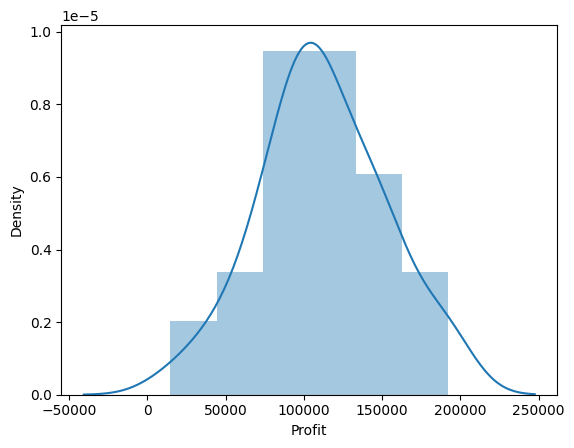

In [85]:
sns.distplot(data['Profit'],bins = 6, kde= True)

Text(0.5, 0, 'Continuous variabel')

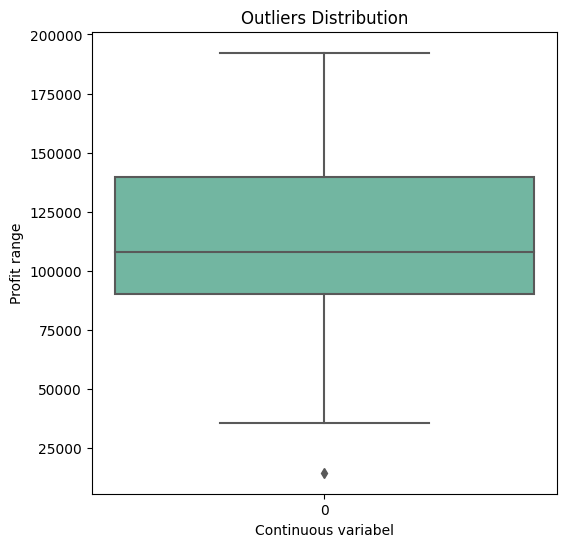

In [86]:
plt.rcParams['figure.figsize']=[6,6]
sns.boxplot(data=data['Profit'],orient='v',palette='Set2',width=.9)
plt.title('Outliers Distribution')
plt.ylabel('Profit range')
plt.xlabel('Continuous variabel')

C:\Users\Avnish Roy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


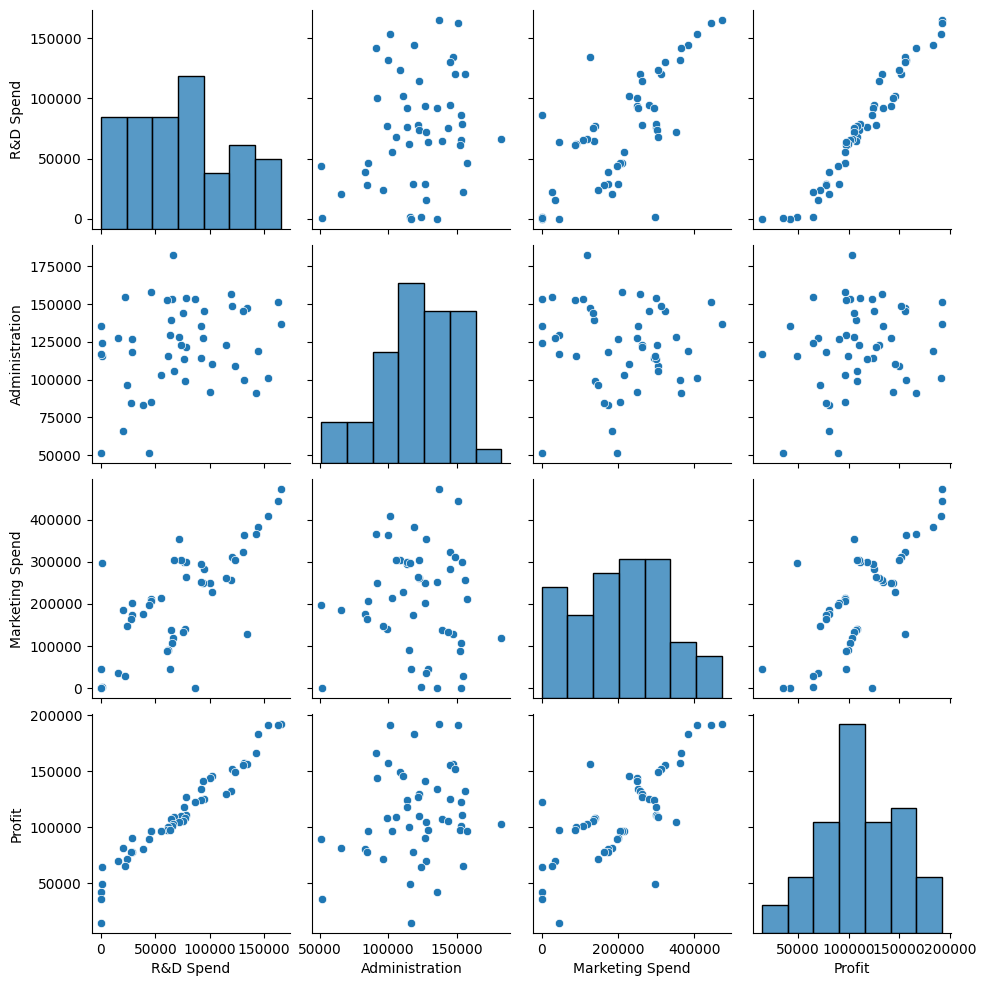

In [87]:
sns.pairplot(data)
plt.show()

splitting data into training and testing set 

In [88]:
x=data.drop(['Profit'],axis=1)
y=data['Profit']

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [90]:
x_train=x_train.values

In [91]:
x_train

array([[ 55493.95, 103057.49, 214634.81],
       [ 46014.02,  85047.44, 205517.64],
       [ 75328.87, 144135.98, 134050.07],
       [ 46426.07, 157693.92, 210797.67],
       [ 91749.16, 114175.79, 294919.57],
       [130298.13, 145530.06, 323876.68],
       [119943.24, 156547.42, 256512.92],
       [  1000.23, 124153.04,   1903.93],
       [   542.05,  51743.15,      0.  ],
       [ 65605.48, 153032.06, 107138.38],
       [114523.61, 122616.84, 261776.23],
       [ 61994.48, 115641.28,  91131.24],
       [ 63408.86, 129219.61,  46085.25],
       [ 78013.11, 121597.55, 264346.06],
       [ 23640.93,  96189.63, 148001.11],
       [ 76253.86, 113867.3 , 298664.47],
       [ 15505.73, 127382.3 ,  35534.17],
       [120542.52, 148718.95, 311613.29],
       [ 91992.39, 135495.07, 252664.93],
       [ 64664.71, 139553.16, 137962.62],
       [131876.9 ,  99814.71, 362861.36],
       [ 94657.16, 145077.58, 282574.31],
       [ 28754.33, 118546.05, 172795.67],
       [     0.  , 116983.8 ,  451

In [92]:
x_test = x_test.values

In [93]:
y_train = y_train.values

In [94]:
y_test = y_test.values

In [95]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [96]:
y_pred=model.predict(x_test)
y_pred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

In [97]:
testdata_model_score=model.score(x_test,y_test)
print(testdata_model_score)
traindata_model_score=model.score(x_train,y_train)
print(traindata_model_score)


0.9393955917820569
0.9499572530324031


In [98]:
dataset=pd.DataFrame(data={'Actual_values':y_test.flatten(),'Predicted_values':y_pred.flatten()})

In [99]:
dataset

,Actual_values,Predicted_values
0,103282.38,103901.896970
1,144259.40,132763.059931
2,146121.95,133567.903700
3,77798.83,72911.789767
4,191050.39,179627.925672
5,105008.31,115166.648648
6,81229.06,67113.576906
7,97483.56,98154.806868
8,110352.25,114756.115552
9,166187.94,169064.014088


## Model Evaluation

In [100]:
r2score=r2_score(y_pred,y_test)
print(r2score)

0.9359154989043084


In [101]:
mse=mean_squared_error(y_pred,y_test)
print(mse)

77506468.16885428


In [102]:
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
print(rmse)

8803.775790469354


In [103]:
mae=mean_absolute_error(y_pred,y_test)
print(mae)

7320.4416148481305


## so, the mean absolute error is 7320.441614848134. Therefore our predicted value can be 7320.441614848134 units more or less than the actual value